<a href="https://colab.research.google.com/github/MatthewK84/LinkedIn-Learning-Journey/blob/main/Simple_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas matplotlib

[*********************100%%**********************]  1 of 1 completed


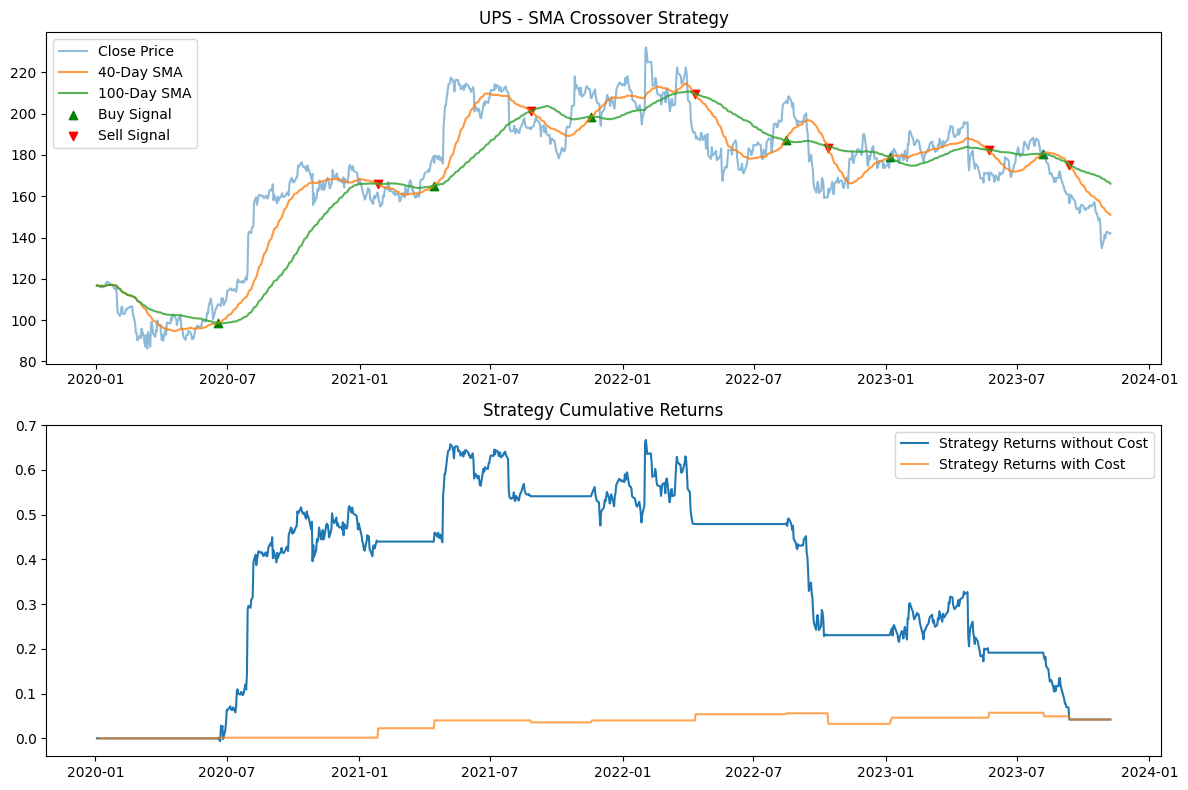

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Fetch historical data
ticker = "UPS"  # Example: UPS
data = yf.download(ticker, start="2020-01-01", end="2023-11-09")

# Calculate Simple Moving Averages (SMA)
short_window = 40
long_window = 100
data['SMA40'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['SMA100'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['SMA40'][short_window:] > data['SMA100'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Incorporate Transaction Costs
transaction_cost = 0.10  # Example: $0.10 per share
data['Position_with_cost'] = data['Position']
data.loc[data['Position'] == 1, 'Position_with_cost'] -= transaction_cost
data.loc[data['Position'] == -1, 'Position_with_cost'] += transaction_cost

# Calculate strategy returns with costs
data['Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Returns'] * data['Signal'].shift(1)
data['Strategy_Returns_with_Cost'] = data['Returns'] * data['Position_with_cost'].shift(1)

# Plotting
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA40'], label='40-Day SMA', alpha=0.8)
plt.plot(data['SMA100'], label='100-Day SMA', alpha=0.8)
plt.scatter(data.index[data['Position'] == 1], data['SMA40'][data['Position'] == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(data.index[data['Position'] == -1], data['SMA40'][data['Position'] == -1], label='Sell Signal', marker='v', color='red')
plt.title(f'{ticker} - SMA Crossover Strategy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(data['Strategy_Returns'].cumsum(), label='Strategy Returns without Cost')
plt.plot(data['Strategy_Returns_with_Cost'].cumsum(), label='Strategy Returns with Cost', alpha=0.7)
plt.title('Strategy Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Download historical data for S&P 500 Index
data = yf.download('^GSPC', start='2000-01-01', end='2022-12-31')

# Calculating the return
initial_value = data['Adj Close'].iloc[0]
final_value = data['Adj Close'].iloc[-1]
total_return = (final_value - initial_value) / initial_value

# Annualizing the return
years = 2022 - 2000
annualized_return = (final_value / initial_value) ** (1 / years) - 1

print(f"Total Return: {total_return*100:.2f}%")
print(f"Annualized Return: {annualized_return*100:.2f}%")

[*********************100%%**********************]  1 of 1 completed
Total Return: 163.84%
Annualized Return: 4.51%
